In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot
import os
import json


In [2]:
# # Customizable environment variables
# n_categories = 10  # Number of categories to be classified
# n_variables = 121  # Number of variables in the dataset
# mcm_filename_format = "train-images-unlabeled-{}_bootstrap_comms.dat"
# data_filename_format = "train-images-unlabeled-{}.dat"
# data_path = "../INPUT_all/data/"
# communities_path = "../OUTPUT/comms/"
# output_path = "../OUTPUT/"

In [3]:
# print("{:-^50}".format("  MCM-Classifier  ")) 

# test_data = load_data("../INPUT/data/test-images-unlabeled-all-uniform.txt").astype(int)
# test_labels = load_labels("../INPUT/data/test-labels-uniform.txt").astype(int)

# # Step 1: Initialize classifier
# classifier = MCM_Classifier(n_categories, n_variables, mcm_filename_format, data_filename_format, data_path, communities_path)

# # Step 2: Train
# classifier.fit(greedy=True, max_iter=1000000, max_no_improvement=100000)



In [4]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [5]:
# def plot_histogram(icc_Ps, columns):
#     plt.figure()
#     for i in columns:
#         plt.hist(icc_Ps[:, i])
#     plt.xlabel('Probability')
#     plt.ylabel('Frequency')
#     plt.title('Histogram of icc_Ps')
#     plt.legend([f'Digit {i}' for i in columns])
#     plt.show()

In [6]:
samples_path = "../OUTPUT/sample_sizes"
mcms_fname = "MCMs.json"
counts_fname = "Counts.json"

with open(os.path.join(samples_path,str(5421), mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(5421), counts_fname), "r") as f:
        C = json.load(f)

In [7]:
all_MCM[-1][0]
# reconstruct structure based on nr icc in MCC

'0000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000010000000000100000000001'

In [8]:
mcm_index = 3

In [9]:
n_variables = 121
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"

# for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM,3,n_variables, data_path,data_filename_format)


In [10]:
all_P_icc_5 = myplot.calculate_P_icc(C, all_MCM,5,n_variables, data_path,data_filename_format)

In [11]:
mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
mcm5_comms_map = myplot.generate_icc_comms_map(all_MCM[5])

In [12]:
# Test if all_P_icc is working correctly
import src.helpers as helpers
data = helpers.load_data("../INPUT_all/data/train-images-unlabeled-0.dat")
res = myplot.calc_p_icc_single(data,C[3],121,all_MCM[3],0)


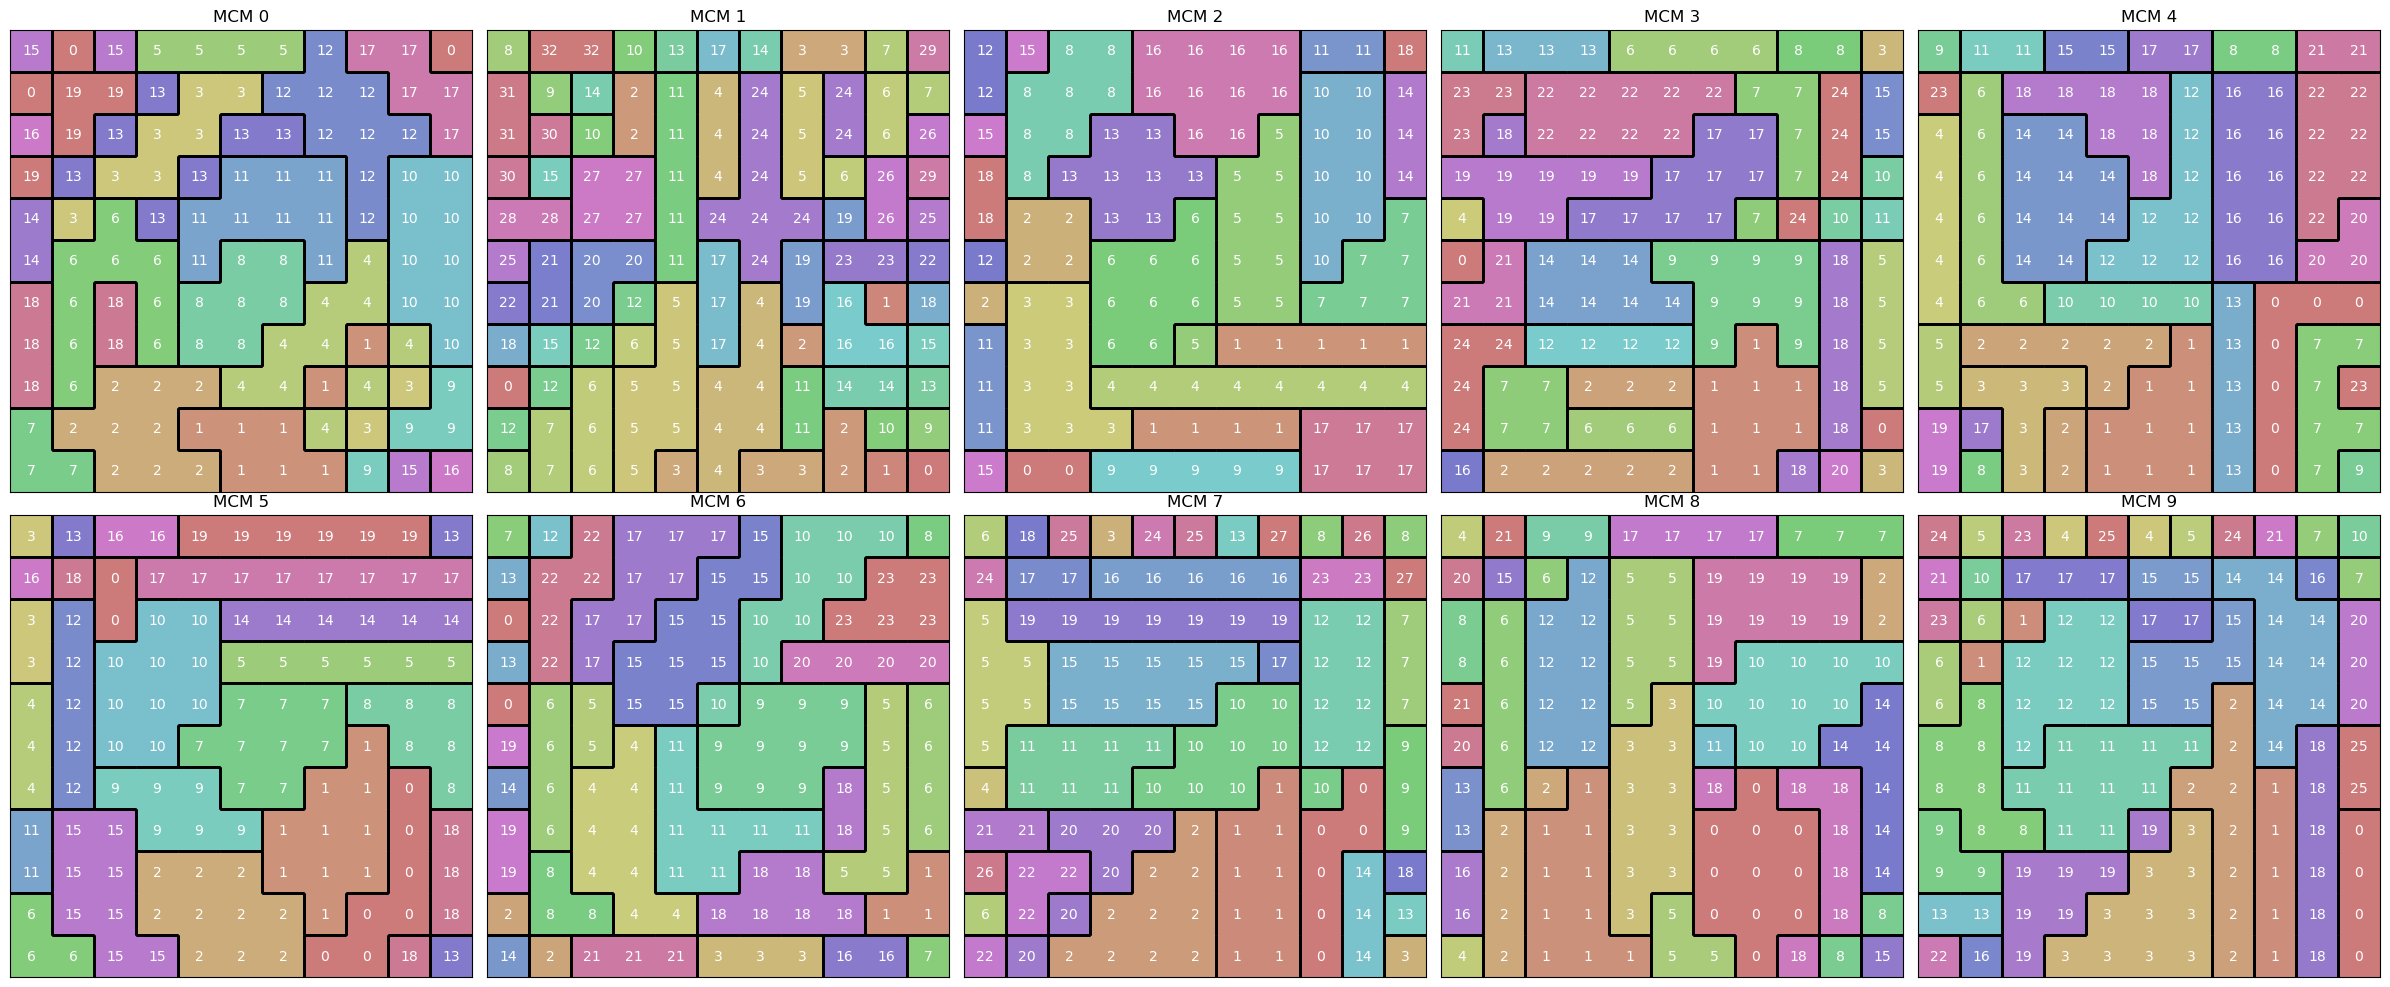

In [13]:
scale = 2
fig, axs  = plt.subplots(2,5,figsize=(12*scale,5*scale))
axs = axs.flatten()
for i, ax in enumerate(axs): 
    myplot.plot_communities(ax,myplot.generate_icc_comms_map(all_MCM[i]),f"MCM {i}")
# myplot.plot_communities(axs[1],mcm5_comms_map,"MCM 5")

plt.tight_layout()
plt.savefig("../figures/paper_comms.png",dpi=300, bbox_inches="tight")

In [14]:
# # difference 3 vs. 5
# dif_35 = all_C_icc_3[:,:,[3,5]].mean(axis=1)
# dif_35 = np.diff(dif_35, axis=1).flatten()

# # difference in means class 3 vs. rest
# dif_3r = all_C_icc_3.mean(axis=1)
# dif_3r = dif_3r[:,3] - dif_3r.mean(axis=1)

In [15]:
# bias = (dif_35[comms]*100).astype(int) 
# absmax = np.abs(bias.flat[np.abs(bias).argmax()]) # scale axis
# # diff_map is difference in average probabilities of an ICC over all images of class 3 vs class 5
# # FIXME problem is that borders are not enough to indicate which cells are the same ICC because they must not be adjacent

# plt.figure()
# # plt.title("Bias of ICC probabilities in MCM 3 for class 3 vs. class 5.") # plt.title(" Higher values = higher avg P for an image of class 3.")
# plt.title("3 vs.5: Indicative ICCs in MCM 3")
# r = (np.mean(bias)+np.std(bias))
# drawing_cond = lambda x: np.abs(x) > r
# myplot.partition_map(plt.gca(),bias,bias,borders,drawing_cond=drawing_cond)
# plt.show()


 Notes on possible indicativity meaures
 - in the supreme court paper by Lee, they calculate the infuence of a supereme justice by calculating e.g., mutual inforamtion(this justice, vs court)
    Option 1: MI
    - MI(own vote, majority vote)
    - for us this would be pixel vote vs. average vote of MCM
        - would need threshold for probability maybe (.5 == majority vote equivalent)
    Option 2: Suseptability Gamma (defined in text)
    

    


- 121 x 121 matrix of membership of which pixels are part of which icc could be useful but only in the new basis, right now the communities are perfectly separated

In [16]:
# comms, 11x11 matrix of integer community labels
# all_C_icc_3, [iccs, images, category] = [x,5k,10] where the iccs are part of 1 MCM 


In [17]:
(all_C_icc_3[0,:,0]/5421).mean()

0.9852804687979145

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
# borders = myplot.find_borders(mcm3_comms_map)
# image_idx = 3

# for image_idx in [3,5,1]:
#     distr = all_C_icc_3[:,:,image_idx]/all_C_icc_3.shape[1] # for MCM 0

#     # Create a DataFrame from distr
#     df = pd.DataFrame(distr.T)

#     fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#     # violin plot
#     # axs[0].bar(bar_positions, out, width=bar_width, color='skyblue')
#     sns.violinplot(data=df, ax=axs[0], inner=None, scale='width', palette='Set3')
#     means = df.mean()
#     axs[0].scatter(range(len(means)), means, marker="_", s =50, color="black")



#     axs[0].set_xlabel('ICC Index')
#     axs[0].set_ylabel('Fraction P(icc = 3|img = 3) > .5')
#     axs[0].set_title('Fraction positive votes (P > .5). Mean shown inside violin plot.')

#     # partitions
#     out = np.sum(distr > .5, axis=1)/all_C_icc_3.shape[1]
#     mapped = (out[mcm3_comms_map]*100).round(1)
#     myplot.partition_map(axs[1], mapped, mapped, borders)
#     axs[1].set_title('Partition Map')

#     plt.tight_layout()
#     plt.show()

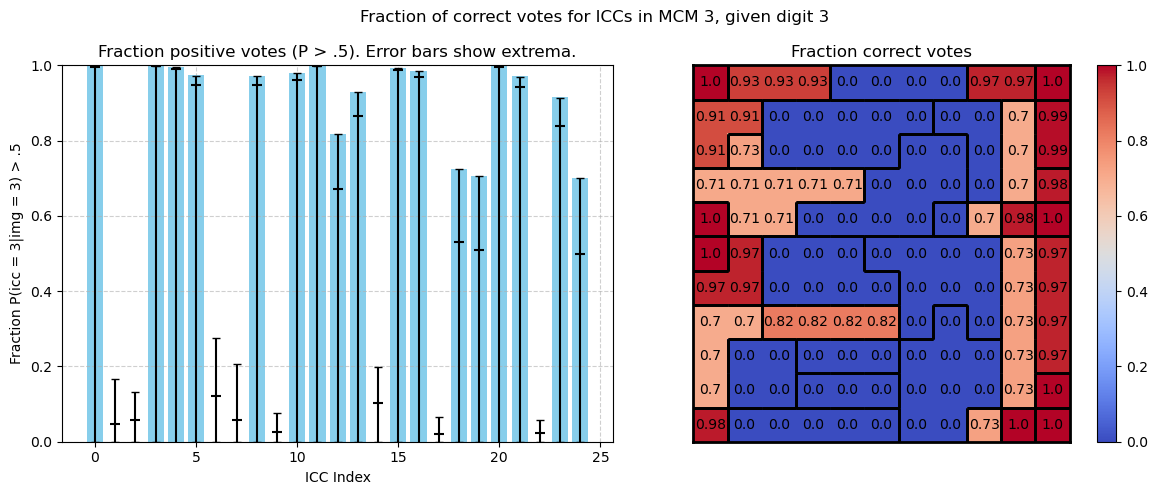

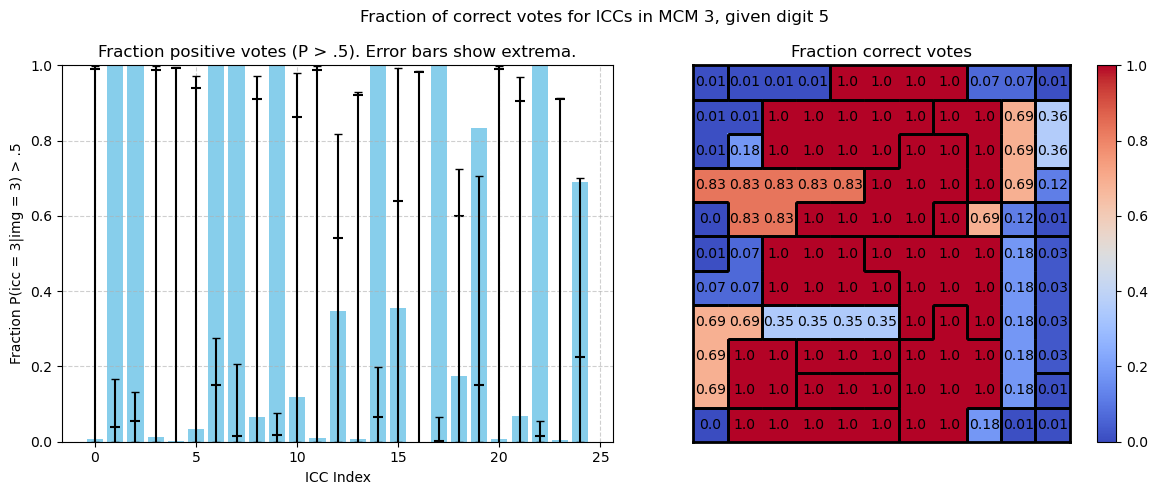

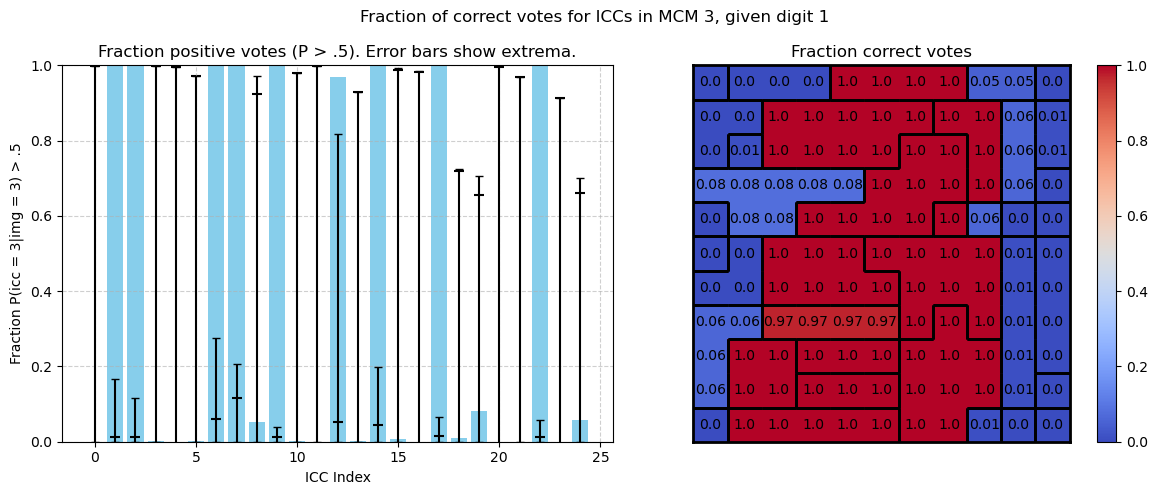

In [88]:
import matplotlib.pyplot as plt
mcm_idx = 3
mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[mcm_idx])
borders = myplot.find_borders(mcm3_comms_map)



for image_idx in [3,5,1]:
    distr = all_C_icc_3[:,:,image_idx]/all_C_icc_3.shape[1] # for MCM 0
    if image_idx == 3:
        out = np.sum(distr > .5, axis=1)/all_C_icc_3.shape[1]
    else:
        out = np.sum(distr < .5, axis=1)/all_C_icc_3.shape[1]
    # out = np.sum(distr, axis=1)/all_C_icc_3.shape[1]
    
    min_values = np.min(distr,axis =1)
    max_values = np.max(distr,axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # bars
    bar_width = 0.8
    n_bars = len(out)
    bar_positions = np.arange(n_bars)
    axs[0].bar(bar_positions, out, width=bar_width, color='skyblue')
    axs[0].errorbar(bar_positions, np.zeros(n_bars), yerr=(np.clip(min_values, 0, 1), np.clip(max_values,0,1)), fmt='none', capsize=3, color='black')

    axs[0].scatter(range(n_bars), np.mean(distr,axis=1), marker="_", s =50, color="black")

    axs[0].set_xlabel('ICC Index')
    axs[0].set_ylabel('Fraction P(icc = 3|img = 3) > .5')
    axs[0].set_title('Fraction positive votes (P > .5). Error bars show extrema.')
    axs[0].grid(True, linestyle='--', alpha=0.6)
    axs[0].set_ylim((0,1))

    # partitions
    mapped = (out[mcm3_comms_map]).round(2)
    myplot.partition_map(axs[1], mapped, mapped, borders, normalise = False)
    axs[1].set_title('Fraction correct votes')
    plt.suptitle(f"Fraction of correct votes for ICCs in MCM 3, given digit {image_idx}")


    plt.tight_layout()
    plt.show()


Test results above with single train image from the category of the MCM.

For example use the first train test image and look if we get a similar distribution as above.

2.1280630366151398e-19


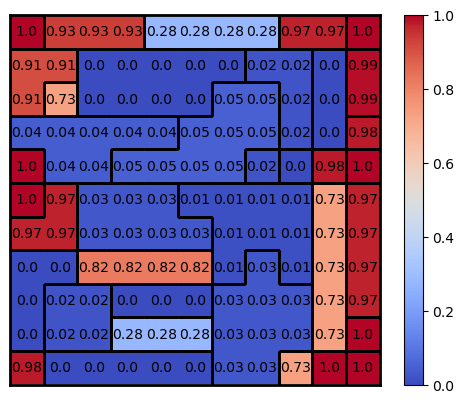

In [92]:
image_idx = 3

train_3 = np.loadtxt("../INPUT_all/data/train-images-unlabeled-3_bootstrap.dat",dtype=str)
P_3 = [np.array(i)/5421 for i in C[3]]
example_img = np.array([int(bit) for bit in train_3[image_idx]])

evidence, probs = __prob_MCM(all_MCM[3],P_3,example_img)

print(evidence)
mapped = (probs[mcm3_comms_map]).round(2)
myplot.partition_map(plt.gca(), mapped,mapped, borders= myplot.find_borders(mcm3_comms_map), normalise=False)

# plt.imshow(mapped)
# plt.colorbar()

In [ ]:
def __prob_MCM(mcm_single,p_mcm,state: np.ndarray, n_variables = 121) -> float: # function taken almost 1:1 from MCM classifier.
    """
    Calculate the probability of a state given a single MCM.

    Loop through each ICC and calculate the probability of the state
    1. Get the probability distribution restricted to specific ICC
    2. Get the state of the variables in the ICC and convert to binary string
    3. Multiply the probability of the state by the probability of the ICC-state

    Args:
    P (np.ndarray): Probability distributions for one category
    MCM (np.ndarray): MCM for one category
    state (np.ndarray): The state to calculate the probability of
    """

    prob = 1
    test = np.zeros(len(mcm_single))
    for j, icc in enumerate(mcm_single):
        p_icc = p_mcm[j]
        idx = [i for i in range(n_variables) if icc[i] == "1"]
        ss = state[idx]
        sm = int("".join([str(s) for s in ss]), 2)
        prob *= p_icc[sm]
        test[j] = p_icc[sm]

    return prob, test

### ICC single vote against Average Vote mutual information plots.
- A "vote" is 1 if P(icc_i| this_image) >= 0.5, else 0.
- Votes are not adjusted for the number of pixels an icc spans

comparing MCMs 3 and 5 for seeing a 3 or a 5

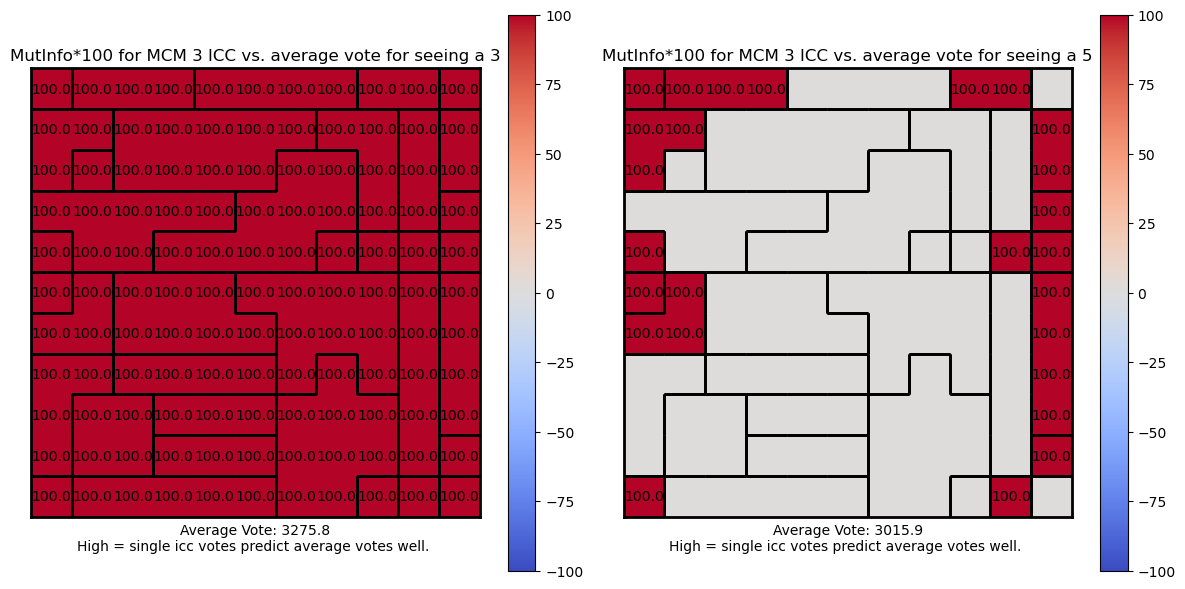

array([1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0.])

In [22]:
#  mutual information between MI(icc_vote, average_vote)
# NOTE: final MCM probability is product not sum so maybe average vote is not fair
# given a 3, calculate the MI(icc_vote, vs average vote)



selected = [3, 5]
myplot.compare_mcm_mutual_info_avg_vote(selected, all_C_icc_3,mcm3_comms_map,3)
# myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_5,mcm5_comms_map,5)

 0 vs. 1 are very easy to classify

In [23]:
# for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_P_icc_0 = myplot.calculate_P_icc(P, all_MCM,0,n_variables, data_path,data_filename_format)
all_P_icc_1 = myplot.calculate_P_icc(P, all_MCM,1,n_variables, data_path,data_filename_format)


NameError: name 'P' is not defined

In [ ]:

mcm0_comms_map = myplot.generate_icc_comms_map(all_MCM[0])
mcm1_comms_map = myplot.generate_icc_comms_map(all_MCM[1])

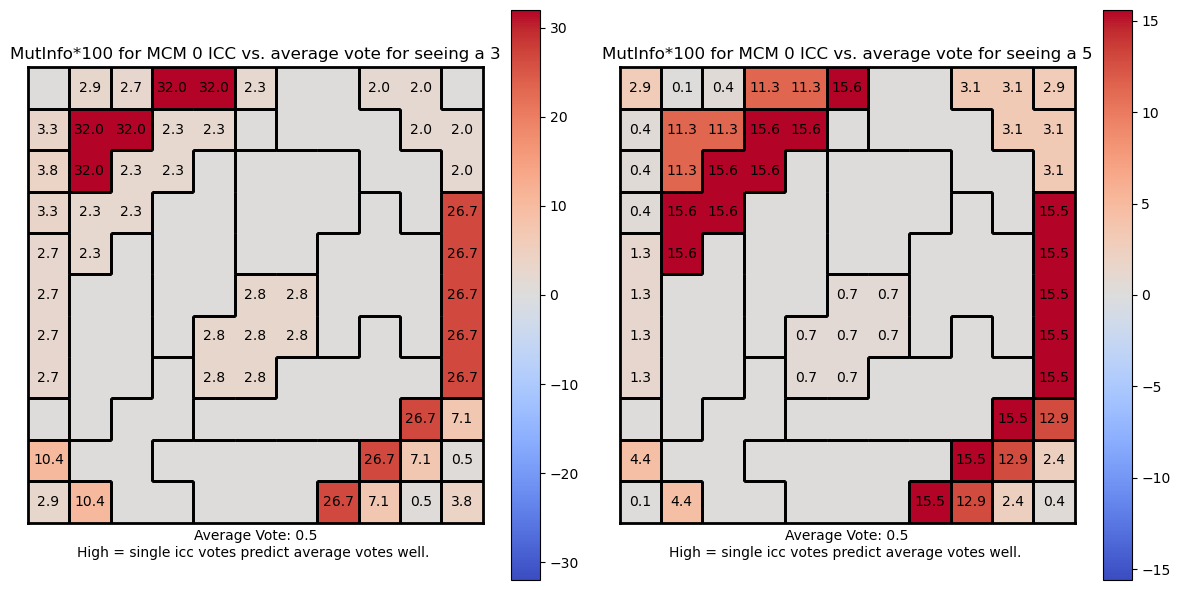

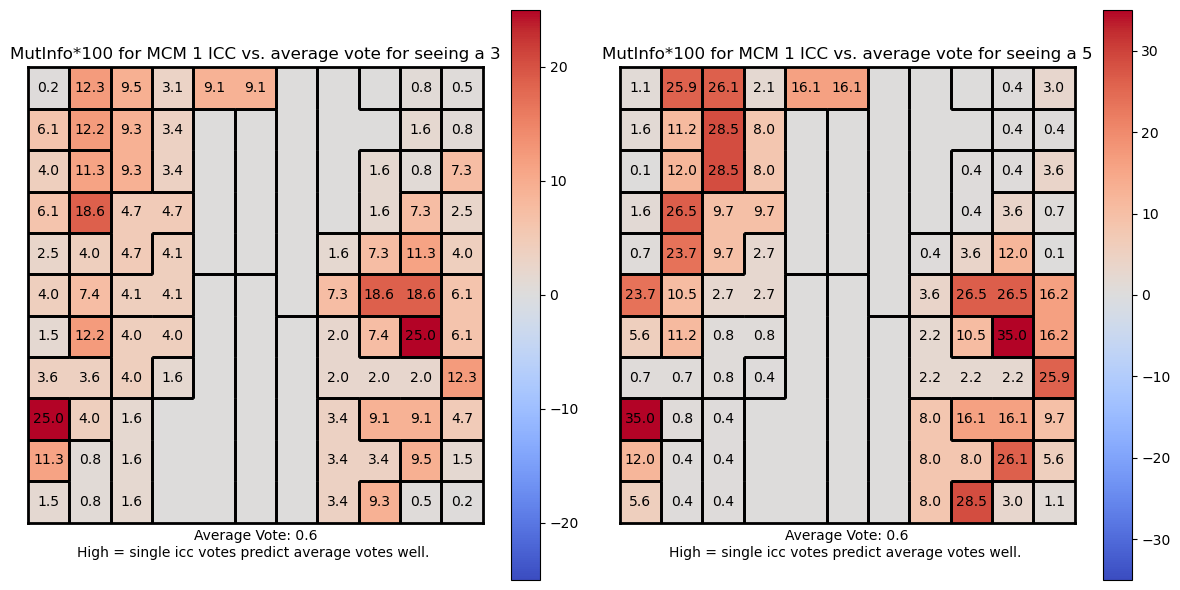

In [ ]:
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_0, mcm0_comms_map,0)
myplot.compare_mcm_mutual_info_avg_vote(selected, all_P_icc_1, mcm1_comms_map,1)

In [ ]:
# need a co-occurance matrix of what it was called
# 121 by 121 of how destinctive that pixel is between 3 vs. 5

# 1 matrix = 1 image
# what icc these pixels are part of


---------------

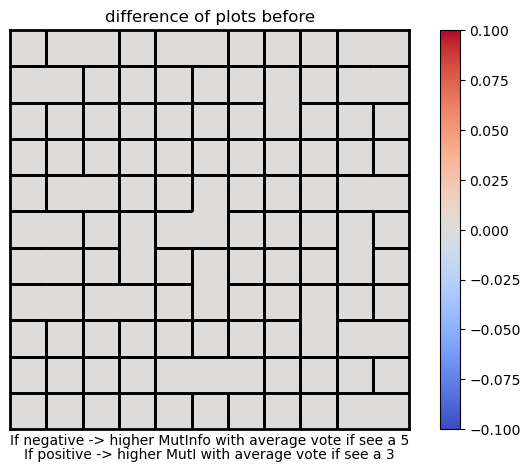

In [ ]:
# #  mutual information between MI(icc_vote, average_vote)
# # NOTE: final MCM probability is product not sum so maybe average vote is not fair
# # given a 3, calculate the MI(icc_vote, vs average vote)
# from sklearn.metrics import normalized_mutual_info_score

# selected = [3, 5]
# nr_comms = np.max(mcm3_comms_map)+1

# plt.figure()
# # plt.title("Difference in MI class3 -class5 for icc in MCM3 vs. average")
# plt.title("difference of plots before") 
# P_m3_c3 = all_C_icc_3[:,:,3]
# P_m3_c5 = all_C_icc_3[:,:,5]
# # Average vs. Individual predicted label
# out1 = np.zeros(nr_comms)
# out2 = np.zeros(nr_comms)
# for i in range(nr_comms):
#     out1[i]=normalized_mutual_info_score(np.where(P_m3_c3.mean(axis=0)>=0.5,1,0),np.where(P_m3_c3[i,:]>=0.5,1,0))
#     out2[i]=normalized_mutual_info_score(np.where(P_m3_c5.mean(axis=0)>=0.5,1,0),np.where(P_m3_c5[i,:]>=0.5,1,0))

# # mi_matrix = (out1[comms]*100).round(1)
# mi_matrix = ((out1[mcm3_comms_map] -out2[mcm3_comms_map])*100).astype(int)
# plt.text(5,11, f"If negative -> higher MutInfo with average vote if see a 5", ha="center", va="bottom") # note vote not adjusted for number of pixels
# plt.text(5,11+0.4, f"If positive -> higher MutI with average vote if see a 3", ha="center", va="bottom") # note vote not adjusted for number of pixels

# myplot.partition_map(plt.gca(),mi_matrix,mi_matrix,myplot.find_borders(mcm3_comms_map),drawing_cond=lambda x: x!=0)                        
# plt.tight_layout()
# plt.show()
